___

# Hand-written Digits Image Classification RNN 
___


<h2>Table of Contents</h2>
<p>In this lab, you will use a neural network Classifier (from keras) to classify handwritten digits from the MNIST database.</p>

* [1. Loading packages ](#chap1)
* [2. Loading Data ](#chap2)
* [3. Model Building ](#chap3)
* [4. Training ...](#chap4)
* [5. Preparation for Model performance ](#chap5)
* [6. `Prediction` and display](#chap6)

        
<p>Estimated Time Needed: <strong> ? min</strong></p>

<hr>

# 1. Loading  packages <a class="anchor" id="chap1"></a>

In [2]:
# Import the libraries we need for this lab

from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Dropout, Flatten
from keras import optimizers
from keras.datasets import mnist
from keras.utils import np_utils
from keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# 2. Loading MNIST Digit Images  <a class="anchor" id="chap2"></a>

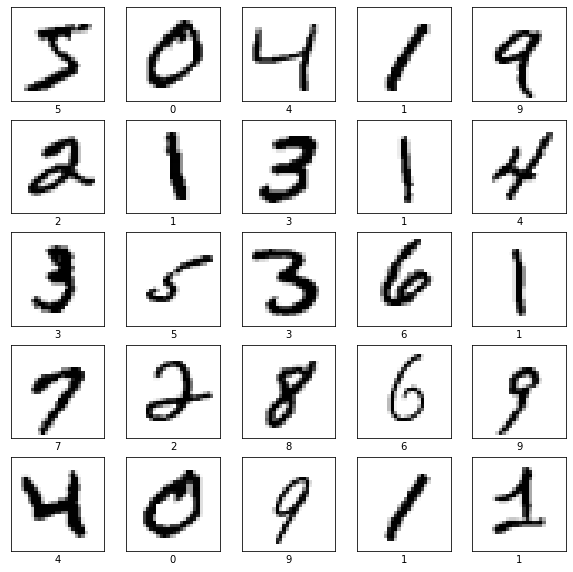

In [3]:
'''' 
-------------------------------------------------------------------------
Loading the MNIST Digit Images
-------------------------------------------------------------------------
'''
(X_train, y_train), (X_test, y_test) = mnist.load_data()

class_names = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']

# Display of some images and associated label
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

Each element in the rectangular tensor corresponds to a number which represents a pixel intensity, as demonstrated by the following image:

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter3/3.32_image_values.png" width="550" alt="MNIST elements" />


In [4]:
# Split into train set and test set 
n_train = 60000 # train size
n_test = 10000  # test size

X_train = X_train[0:n_train,:].astype('float32') / 255.
X_test = X_test[0:n_test,:].astype('float32') / 255.


Y_train = np_utils.to_categorical(y_train[0:n_train], 10)
Y_test = np_utils.to_categorical(y_test[0:n_test], 10)

print('shape X train : ', X_train.shape)
print('shape X test : ', X_test.shape)
print('shape Y train : ', Y_train.shape)
print('shape Y test : ', Y_test.shape)


shape X train :  (60000, 28, 28)
shape X test :  (10000, 28, 28)
shape Y train :  (60000, 10)
shape Y test :  (10000, 10)


# 3. Model building  <a class="anchor" id="chap3"></a>

In [5]:

'''' 
-------------------------------------------------------------------------
Model building ... 
-------------------------------------------------------------------------
'''

num_classes = 10
input_shape= (28,28)

model = Sequential()
model.add(Flatten(input_shape=input_shape)) # imput layer
model.add(Dense(units=128, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=num_classes,activation='softmax')) # output layer


#model.compile(loss='binary_crossentropy', optimizer = 'Adam')
opt = optimizers.Adam(learning_rate=0.01)
loss_funct = "categorical_crossentropy"  # categorical_crossentropy binary_crossentropy
model.compile(loss =loss_funct , optimizer =opt, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# 4. Training  <a class="anchor" id="chap4"></a>

In [6]:
'''' 
-------------------------------------------------------------------------
Training ... 
-------------------------------------------------------------------------
'''

# Training configuration 
n_epoch = 10
n_batch = 128

history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test),  epochs=n_epoch, batch_size=n_batch, verbose = 1)


Epoch 1/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2297 - accuracy: 0.9299 - val_loss: 0.1331 - val_accuracy: 0.9581
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1256 - accuracy: 0.9623 - val_loss: 0.1340 - val_accuracy: 0.9615
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1057 - accuracy: 0.9688 - val_loss: 0.1034 - val_accuracy: 0.9718
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0974 - accuracy: 0.9717 - val_loss: 0.1275 - val_accuracy: 0.9653
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0828 - accuracy: 0.9757 - val_loss: 0.1082 - val_accuracy: 0.9675
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0820 - accuracy: 0.9768 - val_loss: 0.2093 - val_accuracy: 0.9518
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0764 - accuracy: 0.9797 - val_loss: 0.1250 - val_accuracy: 0.9673
Epoch 

# 5. Performances  <a class="anchor" id="chap5"></a>

313/313 [==============================] - 0s 562us/step - loss: 0.1593 - accuracy: 0.9664
Test Loss 0.1592705398797989
Test Accuracy 0.9664000272750854


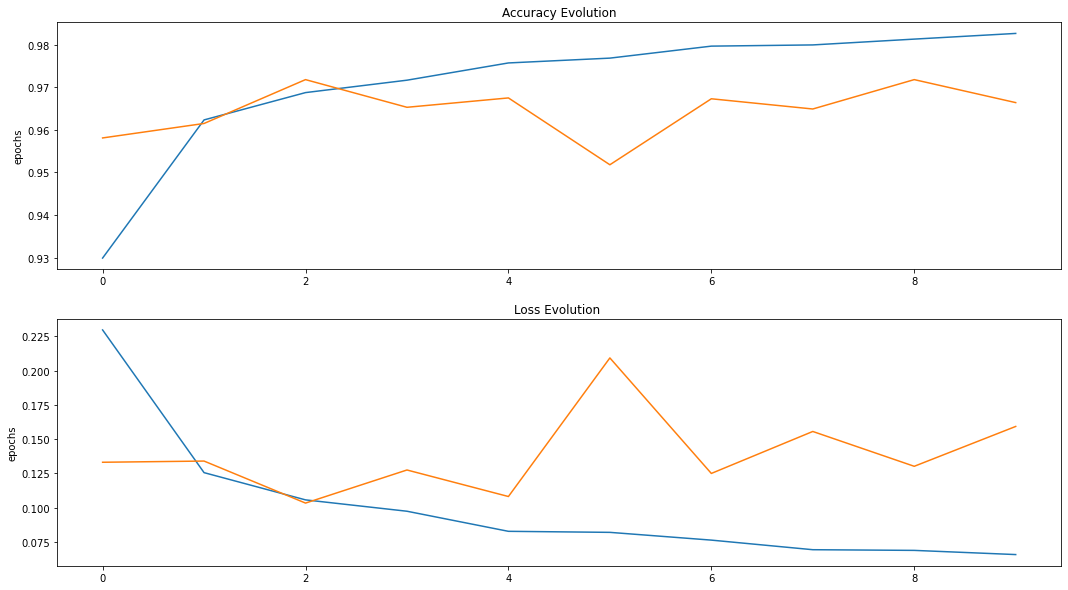

In [7]:

'''' 
-------------------------------------------------------------------------
Performances
-------------------------------------------------------------------------
'''
# Performance evaluation on the training set
mesures_perf_train = model.evaluate(X_train, Y_train)
#print('resultats train : ', mesures_perf_train)

# Performance evaluation on the test set
mesures_perf_test = model.evaluate(X_test, Y_test)
#print('resultats test : ', mesures_perf_test)
print("Test Loss", mesures_perf_test[0])
print("Test Accuracy", mesures_perf_test[1])

# Display of the evolution of the performances according to the epoc
plt.figure(figsize=(18,10))
#Evolution accuracy 
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Evolution')
plt.ylabel('Accuracy')
plt.ylabel('epochs')

#Evolution loss function 
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Evolution ')
plt.ylabel('Loss')
plt.ylabel('epochs')
plt.show()


# 6. Predictions  <a class="anchor" id="chap6"></a>

## Visualization functions

In [33]:
# The function to plot images
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])  
    plt.imshow(img, cmap=plt.cm.binary)  
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# The function to plot the label
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')



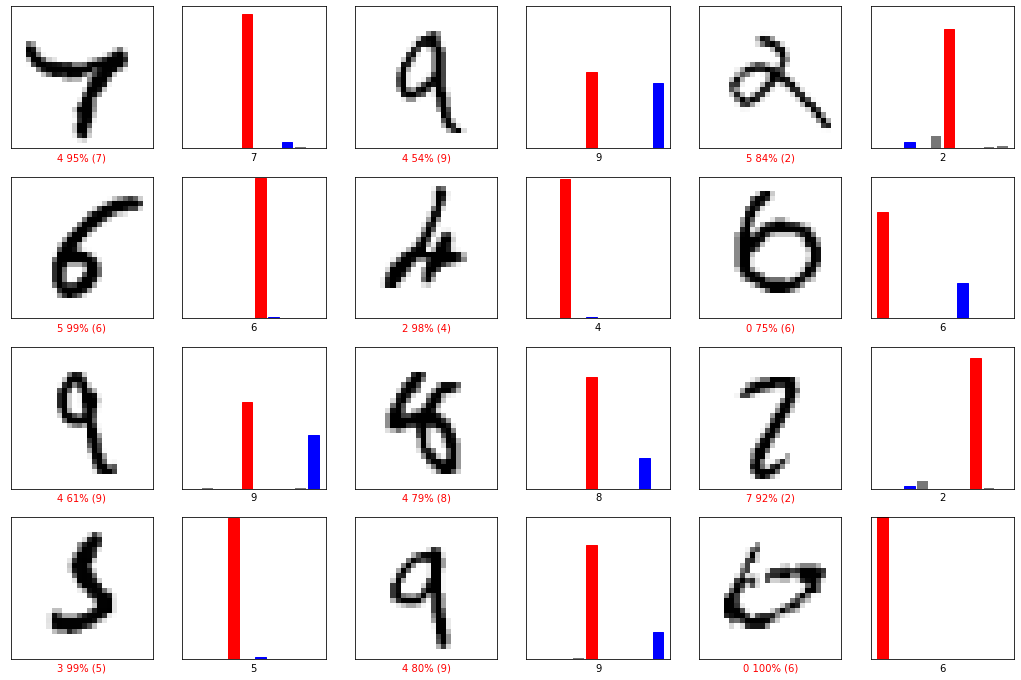

In [40]:
'''' 
-------------------------------------------------------------------------
Predictions
-------------------------------------------------------------------------
'''

predictions = model.predict(X_test)

# Display of some images and their predictions
#    to display the error cases, use the for loop on idx_errors
# Misclassification recovery:
pred_labels = np.argmax(predictions, axis=1)
idx_errors = np.where(pred_labels!=y_test[0:n_test])
plt.figure(figsize=(18,12))
K=0
#for i in range(12):
for i in idx_errors[0][0:12]:    #[12:24]
    plt.subplot(4,6,2*K+1)
    plot_image(i, predictions, y_test, X_test)
    plt.subplot(4,6,2*K+2)
    plot_value_array(i, predictions,  y_test)
    plt.xlabel(class_names[y_test[i]])
    K=K+1
plt.show()

In [1]:
print("The model has successfully trained")
model.save('mnist_RNN.h5')
print("Saving the model as mnist_RNN.h5")

The model has successfully trained


NameError: name 'model' is not defined